In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

import utils
from monster import Kraken

/Users/andrea/anaconda/envs/mlenv/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('data/train_predictedAge.csv')

X = train.drop(['CUST_COD', 'DEFAULT PAYMENT JAN'], axis = 1)
y = train['DEFAULT PAYMENT JAN']

# Perform feature selection

In [3]:
%%time

rfecv = RFECV(estimator=XGBClassifier(base_score=0.2, max_depth=3, n_estimators=80), step=2, cv=StratifiedKFold(5).split(X, y), n_jobs=-1, verbose=2)
rfecv.fit(X, y)

Fitting estimator with 81 features.
Fitting estimator with 81 features.
Fitting estimator with 81 features.
Fitting estimator with 81 features.
Fitting estimator with 81 features.
Fitting estimator with 79 features.
Fitting estimator with 79 features.
Fitting estimator with 79 features.
Fitting estimator with 79 features.
Fitting estimator with 79 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 73 features.
Fitting estimator with 73 features.
Fitting estimator with 73 features.
Fitting estimator with 73 features.
Fitting estimator with 73 features.
Fitting estimator with 71 features.
Fitting estimator with 71 features.
Fitting estimator with 71 fe

Optimal number of features : 51


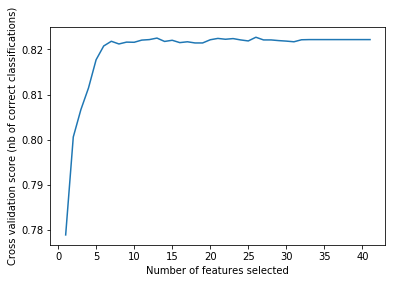

In [4]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [5]:
features = rfecv.get_support()
X.columns[features]

Index(['LIMIT_BAL', 'SEX', 'PAY_DEC', 'PAY_AUG', 'PAY_JUL', 'BILL_AMT_DEC',
       'BILL_AMT_OCT', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'PAY_AMT_DEC', 'PAY_AMT_NOV', 'PAY_AMT_OCT', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'EDUCATION_other', 'MARRIAGE_married',
       'AGE', 'LIMIT-MEAN_BILL', 'AVG_PAY_LAST_2', 'AVG_PAY_LAST_3',
       'AVG_PAY_LAST_4', 'AVG_PAY_LAST_5', 'AVG_PAY_LAST_6', 'PAY_TREND',
       'PAY_SKEW', 'AVG_BILL_AMT_LAST_2', 'AVG_BILL_AMT_LAST_3',
       'AVG_BILL_AMT_LAST_5', 'AVG_BILL_AMT_LAST_6', 'BILL_AMT_TREND',
       'BILL_AMT_SKEW', 'BILL_AMT_KURT', 'AVG_PAY_AMT_LAST_2',
       'AVG_PAY_AMT_LAST_4', 'AVG_PAY_AMT_LAST_6', 'PAY_AMT_TREND',
       'PAY_AMT_SKEW', 'PAY_AMT_KURT', 'DELTA_1', 'DELTA_3', 'DELTA_4',
       'DELTA_5', 'FRAC_PAY_2', 'FRAC_PAY_3', 'FRAC_PAY_4', 'FRAC_PAY_5',
       'BILL_AMT_SIGMA', 'PAY_AMT_SIGMA', 'PAY_SIGMA'],
      dtype='object')

In [6]:
X_train = X.loc[:, features]

# Unleash the Kraken!!

In [7]:
# We also tried other models (Logistic regression, MLPClassifier, AdaBoost, ...), 
# but we have reported only the best performing ones.
# Note that also the choice of the parameters is not random, but we tried to reduce the computations in this notebook

xgb_params = {
    'base_score' : [0.2, 0.3, 0.4],
    'max_depth' : [2, 3, 4],
    'n_estimators' : [80, 95, 120],
    'seed' : [23123]
}

rf_params = {
    'n_estimators' : [80],
    'n_jobs' : [-1],
    'min_samples_split' : [15],
    'min_samples_leaf' : [5]
}

In [8]:
%%time

krk = Kraken([XGBClassifier, RandomForestClassifier], [xgb_params, rf_params])
krk.fit(X_train, y, optimize=True)

Converting X in numpy array
Converting y in numpy array
Created test holdout. % positive class in test holdout = 0.2211270225032546


========== Starting grid search for <class 'xgboost.sklearn.XGBClassifier'> ==========
Evaluating model with parameters: {'max_depth': 2, 'seed': 23123, 'base_score': 0.2, 'n_estimators': 80}
Training fold #1	0.557344064386318
Training fold #2	0.5398655139289145
Training fold #3	0.5297079556898288
Training fold #4	0.5625
Training fold #5	0.5159301130524152
Training fold #6	0.5521472392638037
Training fold #7	0.5308641975308642
Training fold #8	0.5688442211055276
Training fold #9	0.5622568093385214
Training fold #10	0.5510204081632654
Average score: 0.5470480522459458     Average threshold: 0.27707070112228394
Evaluating model with parameters: {'max_depth': 2, 'seed': 23123, 'base_score': 0.2, 'n_estimators': 95}
Training fold #1	0.5597609561752988
Training fold #2	0.5370187561697926
Training fold #3	0.5307769929364279
Training fold #4	0.5595238095238095


Training fold #10	0.5465346534653465
Average score: 0.5468599026867735     Average threshold: 0.2813825011253357
Evaluating model with parameters: {'max_depth': 4, 'seed': 23123, 'base_score': 0.3, 'n_estimators': 80}
Training fold #1	0.5595353339787028
Training fold #2	0.5389930898321816
Training fold #3	0.5350701402805612
Training fold #4	0.5524542829643888
Training fold #5	0.5423387096774194
Training fold #6	0.5531496062992126
Training fold #7	0.5226554267650159
Training fold #8	0.5584158415841585
Training fold #9	0.5512572533849129
Training fold #10	0.5478615071283095
Average score: 0.5461731191894863     Average threshold: 0.2760251760482788
Evaluating model with parameters: {'max_depth': 4, 'seed': 23123, 'base_score': 0.3, 'n_estimators': 95}
Training fold #1	0.5575048732943468
Training fold #2	0.533713200379867
Training fold #3	0.5347912524850894
Training fold #4	0.5575992255566311
Training fold #5	0.5439999999999999
Training fold #6	0.5558852621167161
Training fold #7	0.521367

Training fold #7	0.5244536940686784
Training fold #8	0.5471502590673574
Training fold #9	0.575
Training fold #10	0.5385385385385385
Average score: 0.5423237299876474     Average threshold: 0.2957403456611053
Evaluation finished
Average score values: [0.54232372998764744]
========== Ending grid search for <class 'sklearn.ensemble.forest.RandomForestClassifier'> ==========

Best model found is: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best score training: 0.5493534181809617 - threshold: 0.2957403456611053
Best score validation: 0.5423237299876474



Best model overall is: {'scores_cv': [0.56921587608906099, 0.54367026496565263, 0.52610030706243605, 0

# Predict values

In [9]:
test = pd.read_csv('data/test_all_features.csv')
X_test = test.drop(['DEFAULT PAYMENT JAN', 'CUST_COD'], axis=1)
X_test = X_test.loc[:, features]

In [10]:
predicted_default = krk.predict(X_test)

In [11]:
predicted_default.sum()

1046

# Output the results

In [12]:
test = pd.read_csv('data/test_clean.csv', sep=';')
test['DEFAULT PAYMENT JAN'] = predicted_default
test.to_csv('predictions.csv', index=False)

In [13]:
predictions_df = pd.DataFrame({'CUST_COD' : test['CUST_COD'], 'DEFAULT PAYMENT JAN' : predicted_default})
predictions_df.to_csv('predictions_kaggle_format.csv', index=False)